In [39]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [41]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [42]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [43]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

# 6.2.6 Got the city weather data

In [44]:
# Import the requests library
import requests

In [45]:
# Import the API key.
from config import weather_api_key

In [46]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [47]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=177bd30dd65b9c531359585c3e1ece81


In [48]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [49]:
# Loop thourg all the cities in our list
for i in range(len(cities)):
    
    # Group the cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [50]:
# Loop through all the cities  in the list:
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each coty.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, adn set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 13 | lagoa
Processing Record 3 of Set 13 | vicuna
Processing Record 4 of Set 13 | mullaitivu
City not found. Skipping...
Processing Record 5 of Set 13 | saint-augustin
Processing Record 6 of Set 13 | busselton
Processing Record 7 of Set 13 | arraial do cabo
Processing Record 8 of Set 13 | brest
Processing Record 9 of Set 13 | masuguru
Processing Record 10 of Set 13 | bethel
Processing Record 11 of Set 13 | mahebourg
Processing Record 12 of Set 13 | tumannyy
City not found. Skipping...
Processing Record 13 of Set 13 | saldanha
Processing Record 14 of Set 13 | barrow
Processing Record 15 of Set 13 | qaanaaq
Processing Record 16 of Set 13 | yellowknife
Processing Record 17 of Set 13 | luderitz
Processing Record 18 of Set 13 | eyl
Processing Record 19 of Set 13 | hermanus
Processing Record 20 of Set 13 | vaitupu
City not found. Skipping...
Processing Record 21 of Set 13 | cape town
Processing R

Processing Record 32 of Set 16 | constitucion
Processing Record 33 of Set 16 | adrar
Processing Record 34 of Set 16 | longyearbyen
Processing Record 35 of Set 16 | alofi
Processing Record 36 of Set 16 | idenao
Processing Record 37 of Set 16 | linguere
Processing Record 38 of Set 16 | pangody
Processing Record 39 of Set 16 | mokrousovo
Processing Record 40 of Set 16 | tabou
Processing Record 41 of Set 16 | kavaratti
Processing Record 42 of Set 16 | maloshuyka
City not found. Skipping...
Processing Record 43 of Set 16 | port elizabeth
Processing Record 44 of Set 16 | dingle
Processing Record 45 of Set 16 | kieta
Processing Record 46 of Set 16 | ambilobe
Processing Record 47 of Set 16 | chadiza
Processing Record 48 of Set 16 | venice
Processing Record 49 of Set 16 | carnarvon
Processing Record 50 of Set 16 | mount darwin
Processing Record 1 of Set 17 | olafsvik
Processing Record 2 of Set 17 | seoul
Processing Record 3 of Set 17 | kamenka
Processing Record 4 of Set 17 | thompson
Processing

Processing Record 21 of Set 20 | antsohihy
Processing Record 22 of Set 20 | tecoanapa
Processing Record 23 of Set 20 | sataua
City not found. Skipping...
Processing Record 24 of Set 20 | ribeira grande
Processing Record 25 of Set 20 | kitgum
Processing Record 26 of Set 20 | tomatlan
Processing Record 27 of Set 20 | matelandia
Processing Record 28 of Set 20 | matto
City not found. Skipping...
Processing Record 29 of Set 20 | axim
Processing Record 30 of Set 20 | grand-santi
Processing Record 31 of Set 20 | miyako
Processing Record 32 of Set 20 | havre-saint-pierre
Processing Record 33 of Set 20 | duartina
Processing Record 34 of Set 20 | kholtoson
Processing Record 35 of Set 20 | malakal
Processing Record 36 of Set 20 | norsup
Processing Record 37 of Set 20 | falealupo
City not found. Skipping...
Processing Record 38 of Set 20 | mareeba
Processing Record 39 of Set 20 | henties bay
Processing Record 40 of Set 20 | sola
Processing Record 41 of Set 20 | gurgan
City not found. Skipping...
P

Processing Record 11 of Set 24 | concepcion del uruguay
Processing Record 12 of Set 24 | stokmarknes
Processing Record 13 of Set 24 | tura
Processing Record 14 of Set 24 | reconquista
Processing Record 15 of Set 24 | kasongo-lunda
Processing Record 16 of Set 24 | ankang
Processing Record 17 of Set 24 | lipin bor
Processing Record 18 of Set 24 | quatre cocos
Processing Record 19 of Set 24 | rundu
Processing Record 20 of Set 24 | kautokeino
Processing Record 21 of Set 24 | san cristobal
Processing Record 22 of Set 24 | cabo san lucas
Processing Record 23 of Set 24 | ekhabi
Processing Record 24 of Set 24 | chaman
Processing Record 25 of Set 24 | maceio
Processing Record 26 of Set 24 | gornopravdinsk
Processing Record 27 of Set 24 | ayr
Processing Record 28 of Set 24 | kudahuvadhoo
Processing Record 29 of Set 24 | chumikan
Processing Record 30 of Set 24 | rafraf
Processing Record 31 of Set 24 | tailai
Processing Record 32 of Set 24 | oxapampa
Processing Record 33 of Set 24 | novikovo
Proce

In [51]:
len(city_data)

559

# 6.2.7 Create a DataFrame of City Weather Data

In [52]:
import pandas as pd

In [53]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lagoa,39.0500,-27.9833,67.84,86,96,11.10,PT,2022-07-01 18:12:07
1,Vicuna,-30.0319,-70.7081,53.33,38,74,5.55,CL,2022-07-01 18:12:07
2,Saint-Augustin,51.2260,-58.6502,69.44,52,28,9.46,CA,2022-07-01 18:12:08
3,Busselton,-33.6500,115.3333,48.81,78,0,6.02,AU,2022-07-01 18:12:08
4,Arraial Do Cabo,-22.9661,-42.0278,73.26,73,20,13.80,BR,2022-07-01 18:11:49
5,Brest,52.1000,23.7000,77.41,60,23,12.50,BY,2022-07-01 18:12:08
6,Masuguru,-11.3667,38.4167,71.01,57,2,4.56,TZ,2022-07-01 18:12:09
7,Bethel,41.3712,-73.4140,91.36,58,0,9.22,US,2022-07-01 18:12:09
8,Mahebourg,-20.4081,57.7000,67.24,72,92,17.40,MU,2022-07-01 18:12:09
9,Saldanha,-33.0117,17.9442,59.50,84,18,12.03,ZA,2022-07-01 18:12:10


In [54]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lagoa,PT,2022-07-01 18:12:07,39.0500,-27.9833,67.84,86,96,11.10
1,Vicuna,CL,2022-07-01 18:12:07,-30.0319,-70.7081,53.33,38,74,5.55
2,Saint-Augustin,CA,2022-07-01 18:12:08,51.2260,-58.6502,69.44,52,28,9.46
3,Busselton,AU,2022-07-01 18:12:08,-33.6500,115.3333,48.81,78,0,6.02
4,Arraial Do Cabo,BR,2022-07-01 18:11:49,-22.9661,-42.0278,73.26,73,20,13.80
5,Brest,BY,2022-07-01 18:12:08,52.1000,23.7000,77.41,60,23,12.50
6,Masuguru,TZ,2022-07-01 18:12:09,-11.3667,38.4167,71.01,57,2,4.56
7,Bethel,US,2022-07-01 18:12:09,41.3712,-73.4140,91.36,58,0,9.22
8,Mahebourg,MU,2022-07-01 18:12:09,-20.4081,57.7000,67.24,72,92,17.40
9,Saldanha,ZA,2022-07-01 18:12:10,-33.0117,17.9442,59.50,84,18,12.03


In [55]:
# Create the output CSV file
output_data_file = "weather_data/cities.csv"

#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Latitude vs. Temperature

In [56]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

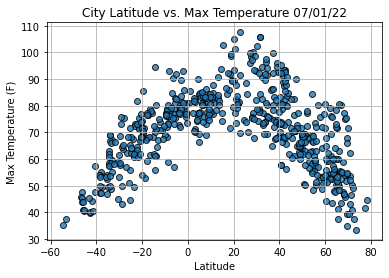

In [57]:
# Import time module
import time

# Build scatter plot for latiutude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker='o',
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
          
# Save the figure.
plt.savefig("weather_data/Fig1.png")
          
# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity

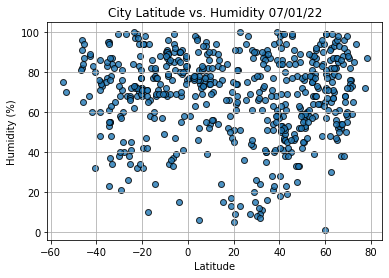

In [58]:
# Build scatter plot for latiutude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker='o',
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
          
# Save the figure.
plt.savefig("weather_data/Fig2.png")
          
# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs. Cloudiness

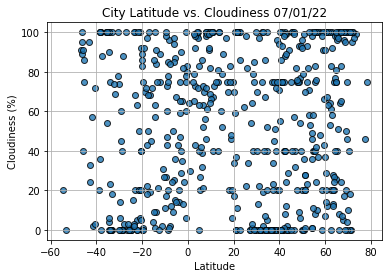

In [59]:
# Build scatter plot for latiutude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker='o',
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
          
# Save the figure.
plt.savefig("weather_data/Fig3.png")
          
# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs. Wind Speed

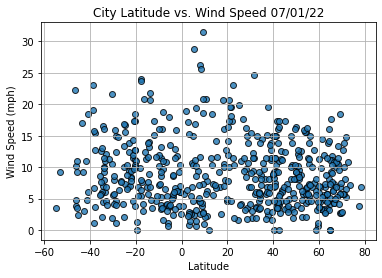

In [60]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature - template

In [74]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regresion on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
        # Run regression on hemisphere weather data
        (slope, intercept, r_value, p_value, stderr) = linregress(x_values, y_values)
        
        # calculate the regression line "y va;ues" from the slope and the intercept
        regress_values = x_values * slope + intercept
        
        #get the equation of the line
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        
        # Create a scatter plot and plot the regression line
        plt.scatter(x_values, y_values)
        plt.plot(x_values, regress_values,"r")
        
        # Annotate the text for the line equation and add its coordinates
        plt.annotate (line_eq, (10,40), fontsize=15, color="red")
        plt.title(title)
        plt.xlabel('Latitude')
        plt.ylabel('Temp')
        plt.show()

In [75]:
# create hemishphere dataframes
index13 = city_data_df.loc[13]
index13

City                     Luderitz
Country                        NA
Date          2022-07-01 18:12:11
Lat                      -26.6481
Lng                       15.1594
Max Temp                    62.24
Humidity                       68
Cloudiness                      0
Wind Speed                   7.81
Name: 13, dtype: object

In [63]:
# We can also filter a DataFrame based on a value of a row
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4      False
       ...  
554     True
555     True
556    False
557     True
558     True
Name: Lat, Length: 559, dtype: bool

In [66]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lagoa,PT,2022-07-01 18:12:07,39.0500,-27.9833,67.84,86,96,11.10
2,Saint-Augustin,CA,2022-07-01 18:12:08,51.2260,-58.6502,69.44,52,28,9.46
5,Brest,BY,2022-07-01 18:12:08,52.1000,23.7000,77.41,60,23,12.50
7,Bethel,US,2022-07-01 18:12:09,41.3712,-73.4140,91.36,58,0,9.22
10,Barrow,US,2022-07-01 18:12:01,71.2906,-156.7887,46.42,76,0,8.05


In [68]:
# create nothersn and southern hemisphere datafames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

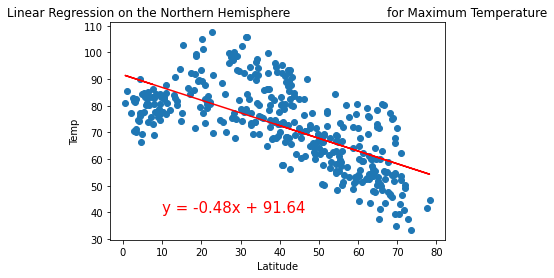

In [76]:
# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

# linear regression on the nothern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

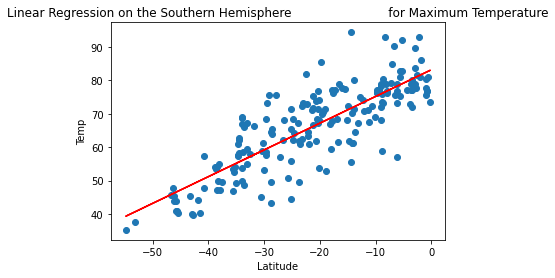

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

# 6.4.3  Find the Correlation Between Latitude and Percent Humidity

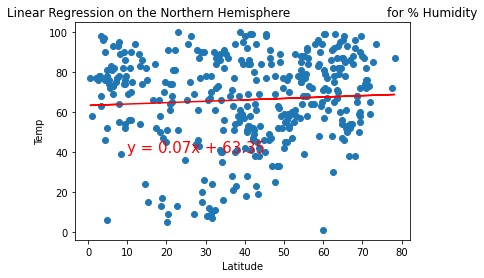

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

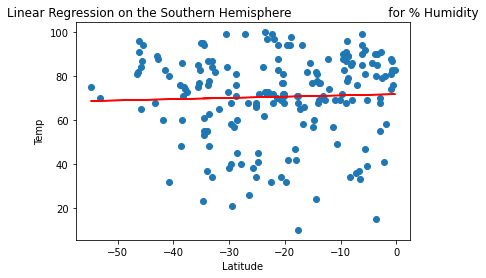

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

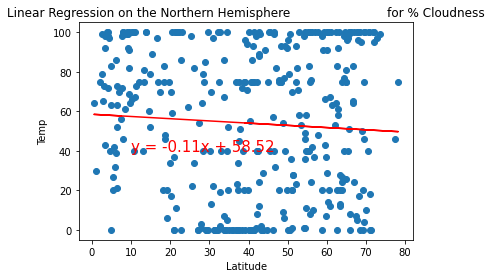

In [88]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudness', '% Cloudiness',(-50,16))

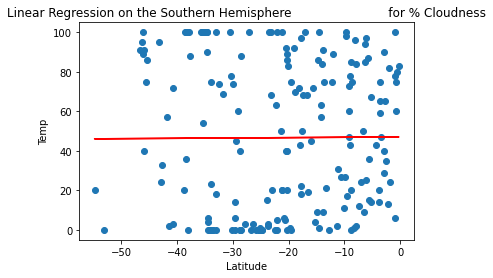

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudness', '% Cloudiness',(-50,60))

# 6.4.5 Find the Correlation Between Latitude and Wind Speed

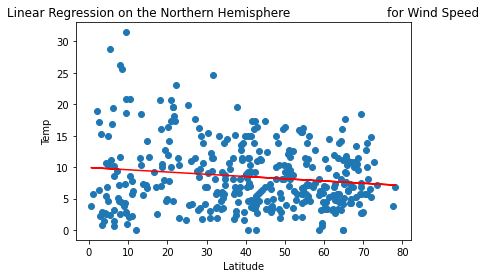

In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

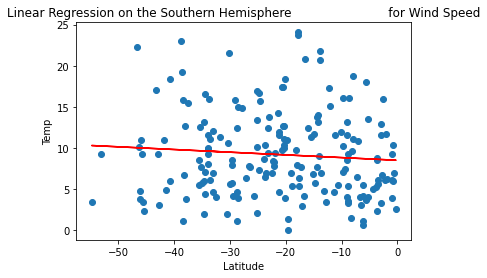

In [90]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))